# Canada Retail Personnel Data Analysis

## 1. Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


## 2. Import Data

In [2]:
df_apps = pd.read_csv('../input/applicant.csv')
df_emp = pd.read_csv('../input/employee.csv')

## 3. Data Cleaning

In [3]:
df_emp['gender'] = df_emp['gender'].astype('category')
df_emp['race'] = df_emp['race'].astype('category')
df_emp['education'] = df_emp['education'].astype('category')
df_emp['marital_status'] = df_emp['marital_status'].astype('category')
df_emp['division'] = df_emp['division'].astype('category')
df_emp['training_status'] = df_emp['training_status'].astype('category')

In [4]:
df_apps['gender'] = df_apps['gender'].astype('category')
df_apps['race'] = df_apps['race'].astype('category')
df_apps['education'] = df_apps['education'].astype('category')
df_apps['marital_status'] = df_apps['marital_status'].astype('category')

In [5]:
common_columns = list(set(df_emp.columns).intersection(df_apps.columns))

Removing gender, race and marital status columns to avoid bias in the analysis.

In [6]:
common_columns.remove('gender')
common_columns.remove('id')
common_columns.remove('race')
common_columns.remove('marital_status')


In [7]:
common_columns

['education',
 'sales_skills',
 'age',
 'cognitive_ability',
 'work_life',
 'extraversion',
 'agreeable',
 'openness',
 'persuasion_skills',
 'conscientiousness',
 'emotion_stability',
 'culture_fit',
 'structured_interview']

Converting nominal data to ordinal data for including hierarchy

In [8]:
df_emp['education'] = pd.Categorical(df_emp['education'], categories=['Some high school', 'High school diploma or equivalent', 'Post-secondary degree', 'Some college'], ordered=True)
df_emp['education'] = df_emp['education'].cat.codes


In [9]:
df_apps['education'] = pd.Categorical(df_apps['education'], categories=['Some high school', 'High school diploma or equivalent', 'Post-secondary degree', 'Some college'], ordered=True)
df_apps['education'] = df_apps['education'].cat.codes


In [10]:
df_emp.columns

Index(['store_id', 'year', 'month', 'population', 'location_code', 'id', 'age',
       'gender', 'race', 'marital_status', 'education', 'division', 'tenure',
       'training_status', 'jlevel', 'salary', 'absent', 'turnover',
       'persuasion_skills', 'commitment', 'respect', 'development', 'goal',
       'perf_feedback', 'perf_fair', 'reward_fair', 'work_life', 'competition',
       'culture_fit', 'extraversion', 'conscientiousness', 'emotion_stability',
       'agreeable', 'openness', 'cognitive_ability', 'structured_interview',
       'business_rating', 'behavior_rating', 'sales_skills'],
      dtype='object')

In [11]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Display all columns of the DataFrame
df = df_emp.describe()

## 4. Linear Regression:

We will be using the employee data to predict the turnover rate of the sales associate candidates by using the common features as predictors.

### 4.1. Linear Regression for predicting Business rating

In [13]:
# Split the data into input features (X) and target variable (y)
X = df_emp[common_columns]
y = df_emp['business_rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression model
model_business_ratings = LinearRegression()

# Fit the model to the training data
model_business_ratings.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = model_business_ratings.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mse


0.2052935433908684

### 4.2. Linear Regression for predicting Behavior rating

In [14]:
# Split the data into input features (X) and target variable (y)
X = df_emp[common_columns]
y = df_emp['behavior_rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression model
model_behavior_ratings = LinearRegression()

# Fit the model to the training data
model_behavior_ratings.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = model_behavior_ratings.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mse


0.3585031405947513

## 5. Predicting ratings for candidates

We use the two linear regression models to predict the ratings and find the top 3 candidates for sales associate position.

In [15]:
# Use the common columns in df_apps to make predictions

X_test_apps = df_apps[common_columns]
y_pred_apps = model_business_ratings.predict(X_test_apps)

# Create a new column 'predicted_rating' in df_apps
df_apps['predicted_business_rating'] = y_pred_apps

# Sort the predicted values in descending order
df_apps_sorted = df_apps.sort_values(by='predicted_business_rating', ascending=False)

# Get the top 3 employees
top_3_employees = df_emp.loc[df_apps_sorted.index[:3]]

top_3_employees
X_test_apps = df_apps[common_columns]
y_pred_apps = model_business_ratings.predict(X_test_apps)

# Create a new column 'predicted_rating' in df_apps
df_apps['predicted_business_rating'] = y_pred_apps

# Sort the predicted values in descending order
df_apps_sorted = df_apps.sort_values(by='predicted_business_rating', ascending=False)

# Get the top 3 employees
top_3_applicants = df_apps.loc[df_apps_sorted.index[:3]]

top_3_applicants



,id,age,gender,race,marital_status,education,yrs_of_sales experience,persuasion_skills,work_life,culture_fit,extraversion,conscientiousness,emotion_stability,agreeable,openness,cognitive_ability,structured_interview,sales_skills,predicted_business_rating
52,150,40,Male,W,Y,3,12.5,3,2,3,5,4,3,1,3,3,5,2,2.801106
51,103,32,Female,W,Y,2,11.6,2,1,1,5,4,3,1,3,3,4,3,2.774069
4,5,34,Female,NW,Y,2,6.8,3,1,3,5,3,3,3,4,2,5,2,2.581442


In [16]:
# Use the common columns in df_apps to make predictions

X_test_apps = df_apps[common_columns]
y_pred_apps = model_behavior_ratings.predict(X_test_apps)

# Create a new column 'predicted_rating' in df_apps
df_apps['predicted_behavior_ratings'] = y_pred_apps

# Sort the predicted values in descending order
df_apps_sorted = df_apps.sort_values(by='predicted_behavior_ratings', ascending=False)

# Get the top 3 employees
top_3_employees = df_emp.loc[df_apps_sorted.index[:3]]

top_3_employees
X_test_apps = df_apps[common_columns]
y_pred_apps = model_business_ratings.predict(X_test_apps)

# Create a new column 'predicted_rating' in df_apps
df_apps['predicted_behavior_ratings'] = y_pred_apps

# Sort the predicted values in descending order
df_apps_sorted = df_apps.sort_values(by='predicted_behavior_ratings', ascending=False)

# Get the top 3 employees
top_3_applicants = df_apps.loc[df_apps_sorted.index[:3]]

top_3_applicants



,id,age,gender,race,marital_status,education,yrs_of_sales experience,persuasion_skills,work_life,culture_fit,extraversion,conscientiousness,emotion_stability,agreeable,openness,cognitive_ability,structured_interview,sales_skills,predicted_business_rating,predicted_behavior_ratings
52,150,40,Male,W,Y,3,12.5,3,2,3,5,4,3,1,3,3,5,2,2.801106,2.801106
51,103,32,Female,W,Y,2,11.6,2,1,1,5,4,3,1,3,3,4,3,2.774069,2.774069
4,5,34,Female,NW,Y,2,6.8,3,1,3,5,3,3,3,4,2,5,2,2.581442,2.581442


## 6. K-means clustering

K-means cluster will help us find common characteristics of empployees

In [17]:
# Select the columns for clustering
X = df_emp[common_columns]

# Create an instance of the KMeans model with the desired number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels as a new column in the dataframe
df_emp['cluster'] = labels

# Print the dataframe with the cluster labels
df_emp


c:\Users\ruchi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,store_id,year,month,population,location_code,id,age,gender,race,marital_status,education,division,tenure,training_status,jlevel,salary,absent,turnover,persuasion_skills,commitment,respect,development,goal,perf_feedback,perf_fair,reward_fair,work_life,competition,culture_fit,extraversion,conscientiousness,emotion_stability,agreeable,openness,cognitive_ability,structured_interview,business_rating,behavior_rating,sales_skills,cluster
0,1,2019,10,114,447,2188,34,Male,W,N,2,Home Appliances,7.5,Y,1,52686.16,10,2,2,3,3,2,1,1,2,2,1,2,3,1,2,2,3,2,2,4,2,2,3,0
1,1,2019,10,114,447,2350,40,Male,W,N,1,Cellphones and Accessories,6.6,N,1,56991.44,19,3,3,1,1,2,2,1,2,5,3,3,1,1,3,3,2,4,1,4,2,2,2,0
2,1,2019,10,114,447,661,21,Female,W,N,3,Cellphones and Accessories,6.9,N,1,48395.48,15,3,1,4,1,1,1,1,2,3,3,4,2,4,4,1,1,2,4,4,3,2,3,1
3,1,2019,10,114,447,5937,44,Female,NW,N,2,Office Products,7.2,Y,2,58628.83,13,4,2,5,4,2,1,1,1,3,1,4,4,3,3,2,5,1,1,3,2,2,2,2
4,1,2019,10,114,447,5734,40,Female,NW,Y,2,Cellphones and Accessories,10.3,N,2,76184.26,18,4,5,1,2,1,2,1,3,3,1,4,3,5,3,4,1,4,3,3,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8793,8814,2019,10,94,436,5414,29,Female,NW,Y,2,Cellphones and Accessories,6.1,N,2,63663.50,26,4,2,1,2,1,1,2,1,1,1,4,2,2,3,3,2,3,3,5,2,1,1,1
8794,8814,2019,10,94,436,425,27,Male,W,N,0,Cellphones and Accessories,6.3,N,2,69121.93,7,2,2,3,1,2,2,2,2,1,3,2,3,3,4,1,4,2,4,4,3,2,3,1
8795,8814,2019,10,94,436,3659,23,Female,NW,N,0,Cellphones and Accessories,4.8,Y,1,42829.04,7,2,2,2,1,2,1,2,1,2,3,2,4,5,2,2,3,2,3,5,3,2,3,1
8796,8814,2019,10,94,436,7615,45,Male,W,N,2,Office Products,11.5,N,4,96917.48,11,4,4,5,2,2,1,3,2,3,2,3,2,4,2,2,4,4,5,4,3,1,3,2


c:\Users\ruchi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


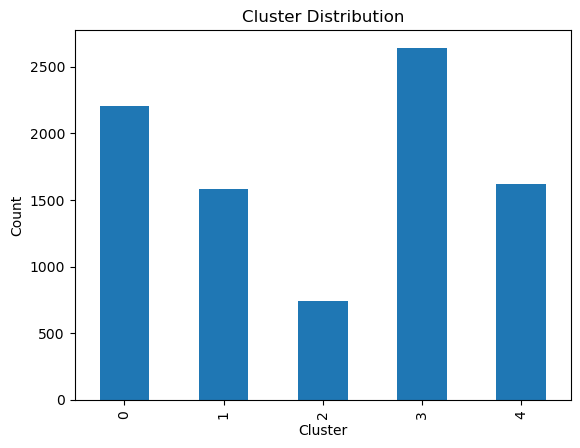

In [18]:
# Select the columns for clustering
X = df_emp[common_columns]

# Create an instance of the KMeans model with the desired number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels as a new column in the dataframe
df_emp['cluster'] = labels

# Create a pivot table to calculate the mean values of each feature for each cluster
# Group by cluster and calculate the count of each cluster
cluster_counts = df_emp.groupby('cluster').size()

# Plot the bar chart
cluster_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Distribution')

# Show the plot
plt.show()

# Plot the heatmap
# sns.heatmap(cluster_means, cmap='coolwarm', annot=True)


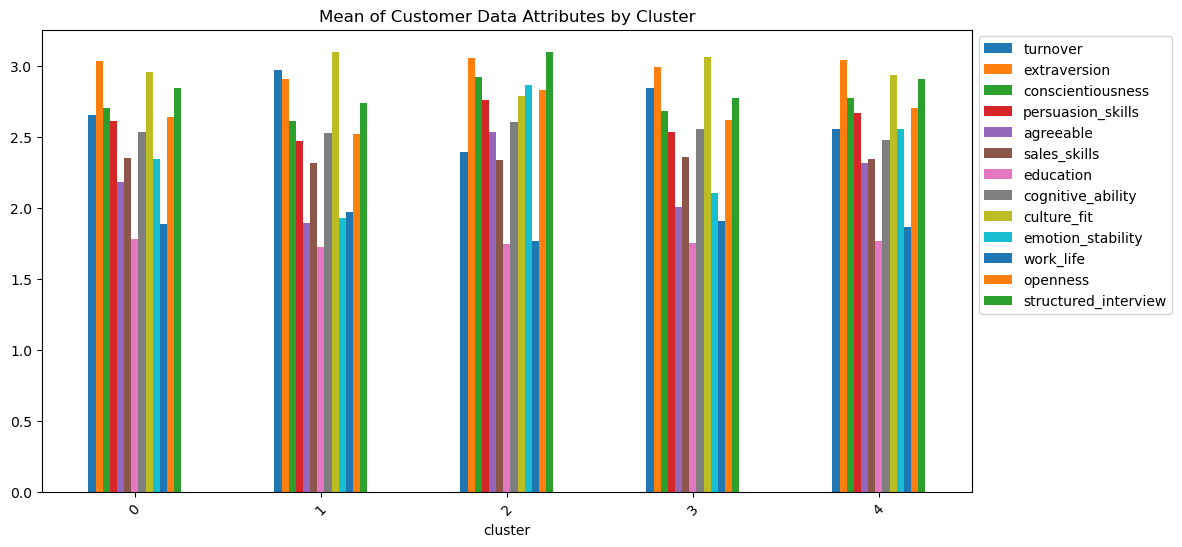

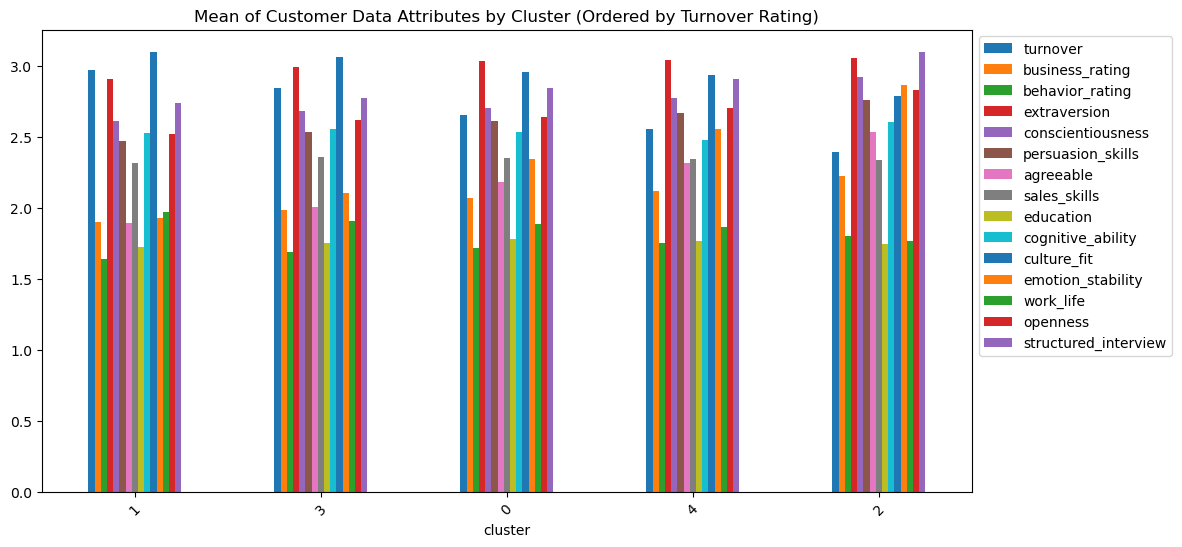

In [19]:

# Plotting the mean of each attribute by cluster

ax = df_emp[['turnover','extraversion', 'conscientiousness', 'persuasion_skills', 'agreeable', 'sales_skills', 'education', 'cognitive_ability', 'culture_fit', 'emotion_stability', 'work_life', 'openness', 'structured_interview', 'cluster']].groupby('cluster').mean().plot(kind='bar', figsize=(12, 6))
plt.title("Mean of Customer Data Attributes by Cluster")
plt.xticks(rotation=45)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Plotting the mean of each attribute by cluster

# Calculate the average turnover rating for each cluster
cluster_turnover_mean = df_emp.groupby('cluster')['turnover'].mean()

# Sort the clusters by average turnover rating
sorted_clusters = cluster_turnover_mean.sort_values(ascending=False).index

# Plot the mean of each attribute by cluster, ordered by average turnover rating
ax = df_emp[['turnover','business_rating', 'behavior_rating','extraversion', 'conscientiousness', 'persuasion_skills', 'agreeable', 'sales_skills', 'education', 'cognitive_ability', 'culture_fit', 'emotion_stability', 'work_life', 'openness', 'structured_interview', 'cluster']].groupby('cluster').mean().loc[sorted_clusters].plot(kind='bar', figsize=(12, 6))

plt.title("Mean of Customer Data Attributes by Cluster (Ordered by Turnover Rating)")
plt.xticks(rotation=45)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))


## 7. Feature engineering

We use a simple average of businesss and behavior ratings as an overall rating

In [20]:
df_emp['overall_rating'] = (df_emp['business_rating']+df_emp['behavior_rating'])/2

In [21]:
df_emp['overall_rating'].describe()

count    8798.000000
mean        1.870993
std         0.608761
min         1.000000
25%         1.500000
50%         2.000000
75%         2.500000
max         3.000000
Name: overall_rating, dtype: float64

Employee Groups based on overall rating and turnover rating

In [22]:
worst = (df_emp['turnover'] >= 4) & (df_emp['overall_rating'] <= 1)
average = (df_emp['turnover'] < 4) & (df_emp['turnover'] > 2) & (df_emp['overall_rating'] > 1) & (df_emp['overall_rating'] < 3)
best = (df_emp['turnover'] == 1) & (df_emp['overall_rating'] == 3)
retained_best = (df_emp['turnover'] > 3) & (df_emp['overall_rating'] == 3)


In [23]:
df_emp.loc[worst, 'turnover'].value_counts()


turnover
4    350
5    167
Name: count, dtype: int64

In [24]:
df_emp.loc[average, 'turnover'].value_counts()


turnover
3    1838
Name: count, dtype: int64

In [25]:
df_emp.loc[best, 'turnover'].value_counts()

turnover
1    241
Name: count, dtype: int64

In [26]:
df_emp.loc[retained_best, 'turnover'].value_counts()

turnover
4    115
5     40
Name: count, dtype: int64

In [27]:
retained_best_count = df_emp.loc[retained_best, 'turnover'].value_counts()

In [28]:
retained_best_count

turnover
4    115
5     40
Name: count, dtype: int64

In [29]:
worst_count = df_emp.loc[worst, 'turnover'].value_counts()
average_count = df_emp.loc[average, 'turnover'].value_counts()
best_count = df_emp.loc[best, 'turnover'].value_counts()


print("Worst Group:")
print(worst_count)

print("\nAverage Group:")
print(average_count)

print("\nBest Group:")
print(best_count)


Worst Group:
turnover
4    350
5    167
Name: count, dtype: int64

Average Group:
turnover
3    1838
Name: count, dtype: int64

Best Group:
turnover
1    241
Name: count, dtype: int64


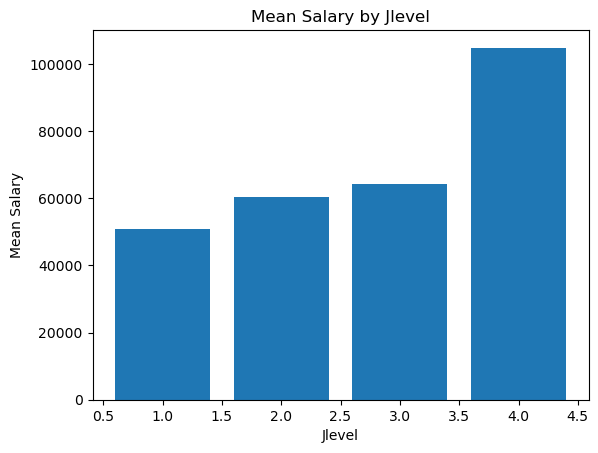

In [30]:
# Group the data by jlevel and calculate the mean salary for each jlevel
df_worst = df_emp[worst]
mean_salary_by_jlevel = df_emp.groupby('jlevel')['salary'].mean()

# Plot the bar plot
plt.bar(mean_salary_by_jlevel.index, mean_salary_by_jlevel.values)

# Add labels and title
plt.xlabel('Jlevel')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by Jlevel')

# Show the plot
plt.show()


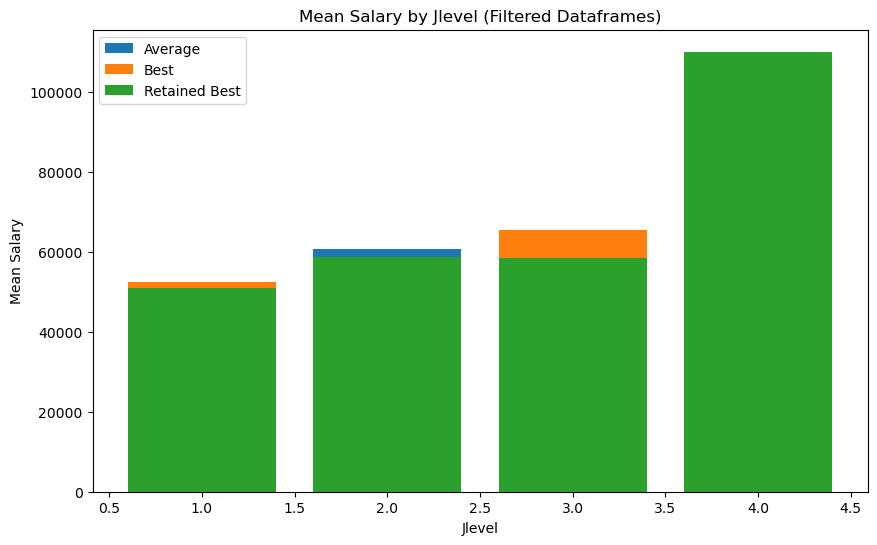

In [31]:
# Group the data by jlevel and calculate the mean salary for each jlevel
mean_salary_by_jlevel_average = df_emp[average].groupby('jlevel')['salary'].mean()
mean_salary_by_jlevel_best = df_emp[best].groupby('jlevel')['salary'].mean()
mean_salary_by_jlevel_retained_best = df_emp[retained_best].groupby('jlevel')['salary'].mean()

# Plot the bar plots
plt.figure(figsize=(10, 6))

# Plot the mean salary for each jlevel in the 'average' cluster
plt.bar(mean_salary_by_jlevel_average.index, mean_salary_by_jlevel_average.values, label='Average')

# Plot the mean salary for each jlevel in the 'best' cluster
plt.bar(mean_salary_by_jlevel_best.index, mean_salary_by_jlevel_best.values, label='Best')

# Plot the mean salary for each jlevel in the 'retained_best' cluster
plt.bar(mean_salary_by_jlevel_retained_best.index, mean_salary_by_jlevel_retained_best.values, label='Retained Best')

# Add labels and title
plt.xlabel('Jlevel')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by Jlevel (Filtered Dataframes)')
plt.legend()

# Show the plot
plt.show()


In [32]:

# Split the data into input features (X) and target variable (y)
X = df_emp[common_columns]
y = df_emp['turnover']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LogisticRegression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
accuracy


c:\Users\ruchi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3880681818181818

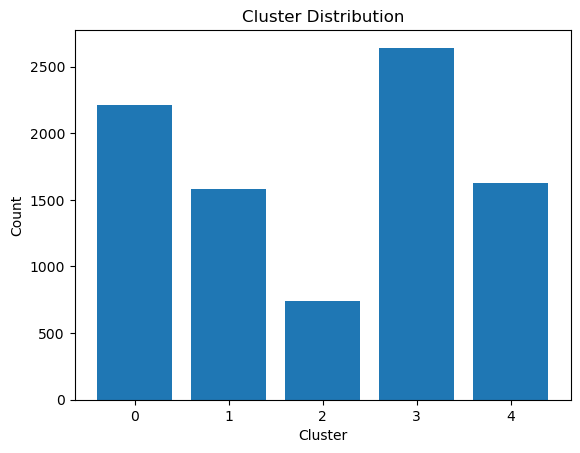

In [33]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each cluster
cluster_counts = df_emp['cluster'].value_counts()

# Plot the bar chart
plt.bar(cluster_counts.index, cluster_counts.values)

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Distribution')

# Show the plot
plt.show()
